In [17]:
#set up the environment
import pandas as pd
import seaborn as sns  #statist graph package
import matplotlib.pyplot as plt  #plot package
df = pd.read_csv('clean_data.csv')
df.shape

(10997, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10997 entries, 0 to 10996
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        10997 non-null  int64  
 1   id                                10997 non-null  int64  
 2   Locality                          10997 non-null  int64  
 3   Type of property                  10997 non-null  object 
 4   Subtype of property               10997 non-null  object 
 5   Type of sale                      10997 non-null  object 
 6   Fully equipped kitchen            10997 non-null  int64  
 7   Fireplace                         10997 non-null  int64  
 8   Terrace                           10997 non-null  int64  
 9   Garden                            10997 non-null  int64  
 10  Garden area                       10997 non-null  float64
 11  Surface of the land               10997 non-null  float64
 12  Surf

In [6]:
categorical_columns = df[['Type of property','Subtype of property', 'Type of sale', 
                      'State of the building', 'Compound Listing', 'Fully equipped kitchen',
                    'Furnished', 'Fireplace', 'Terrace', 'Garden', 'Swimming pool']]
continuous_columns= df[['Price', 'Number of rooms', 'Living Area', 'Terrace area', 'Garden area',
                      'Surface of the land','Surface area of the plot of land', 'Number of facades']]

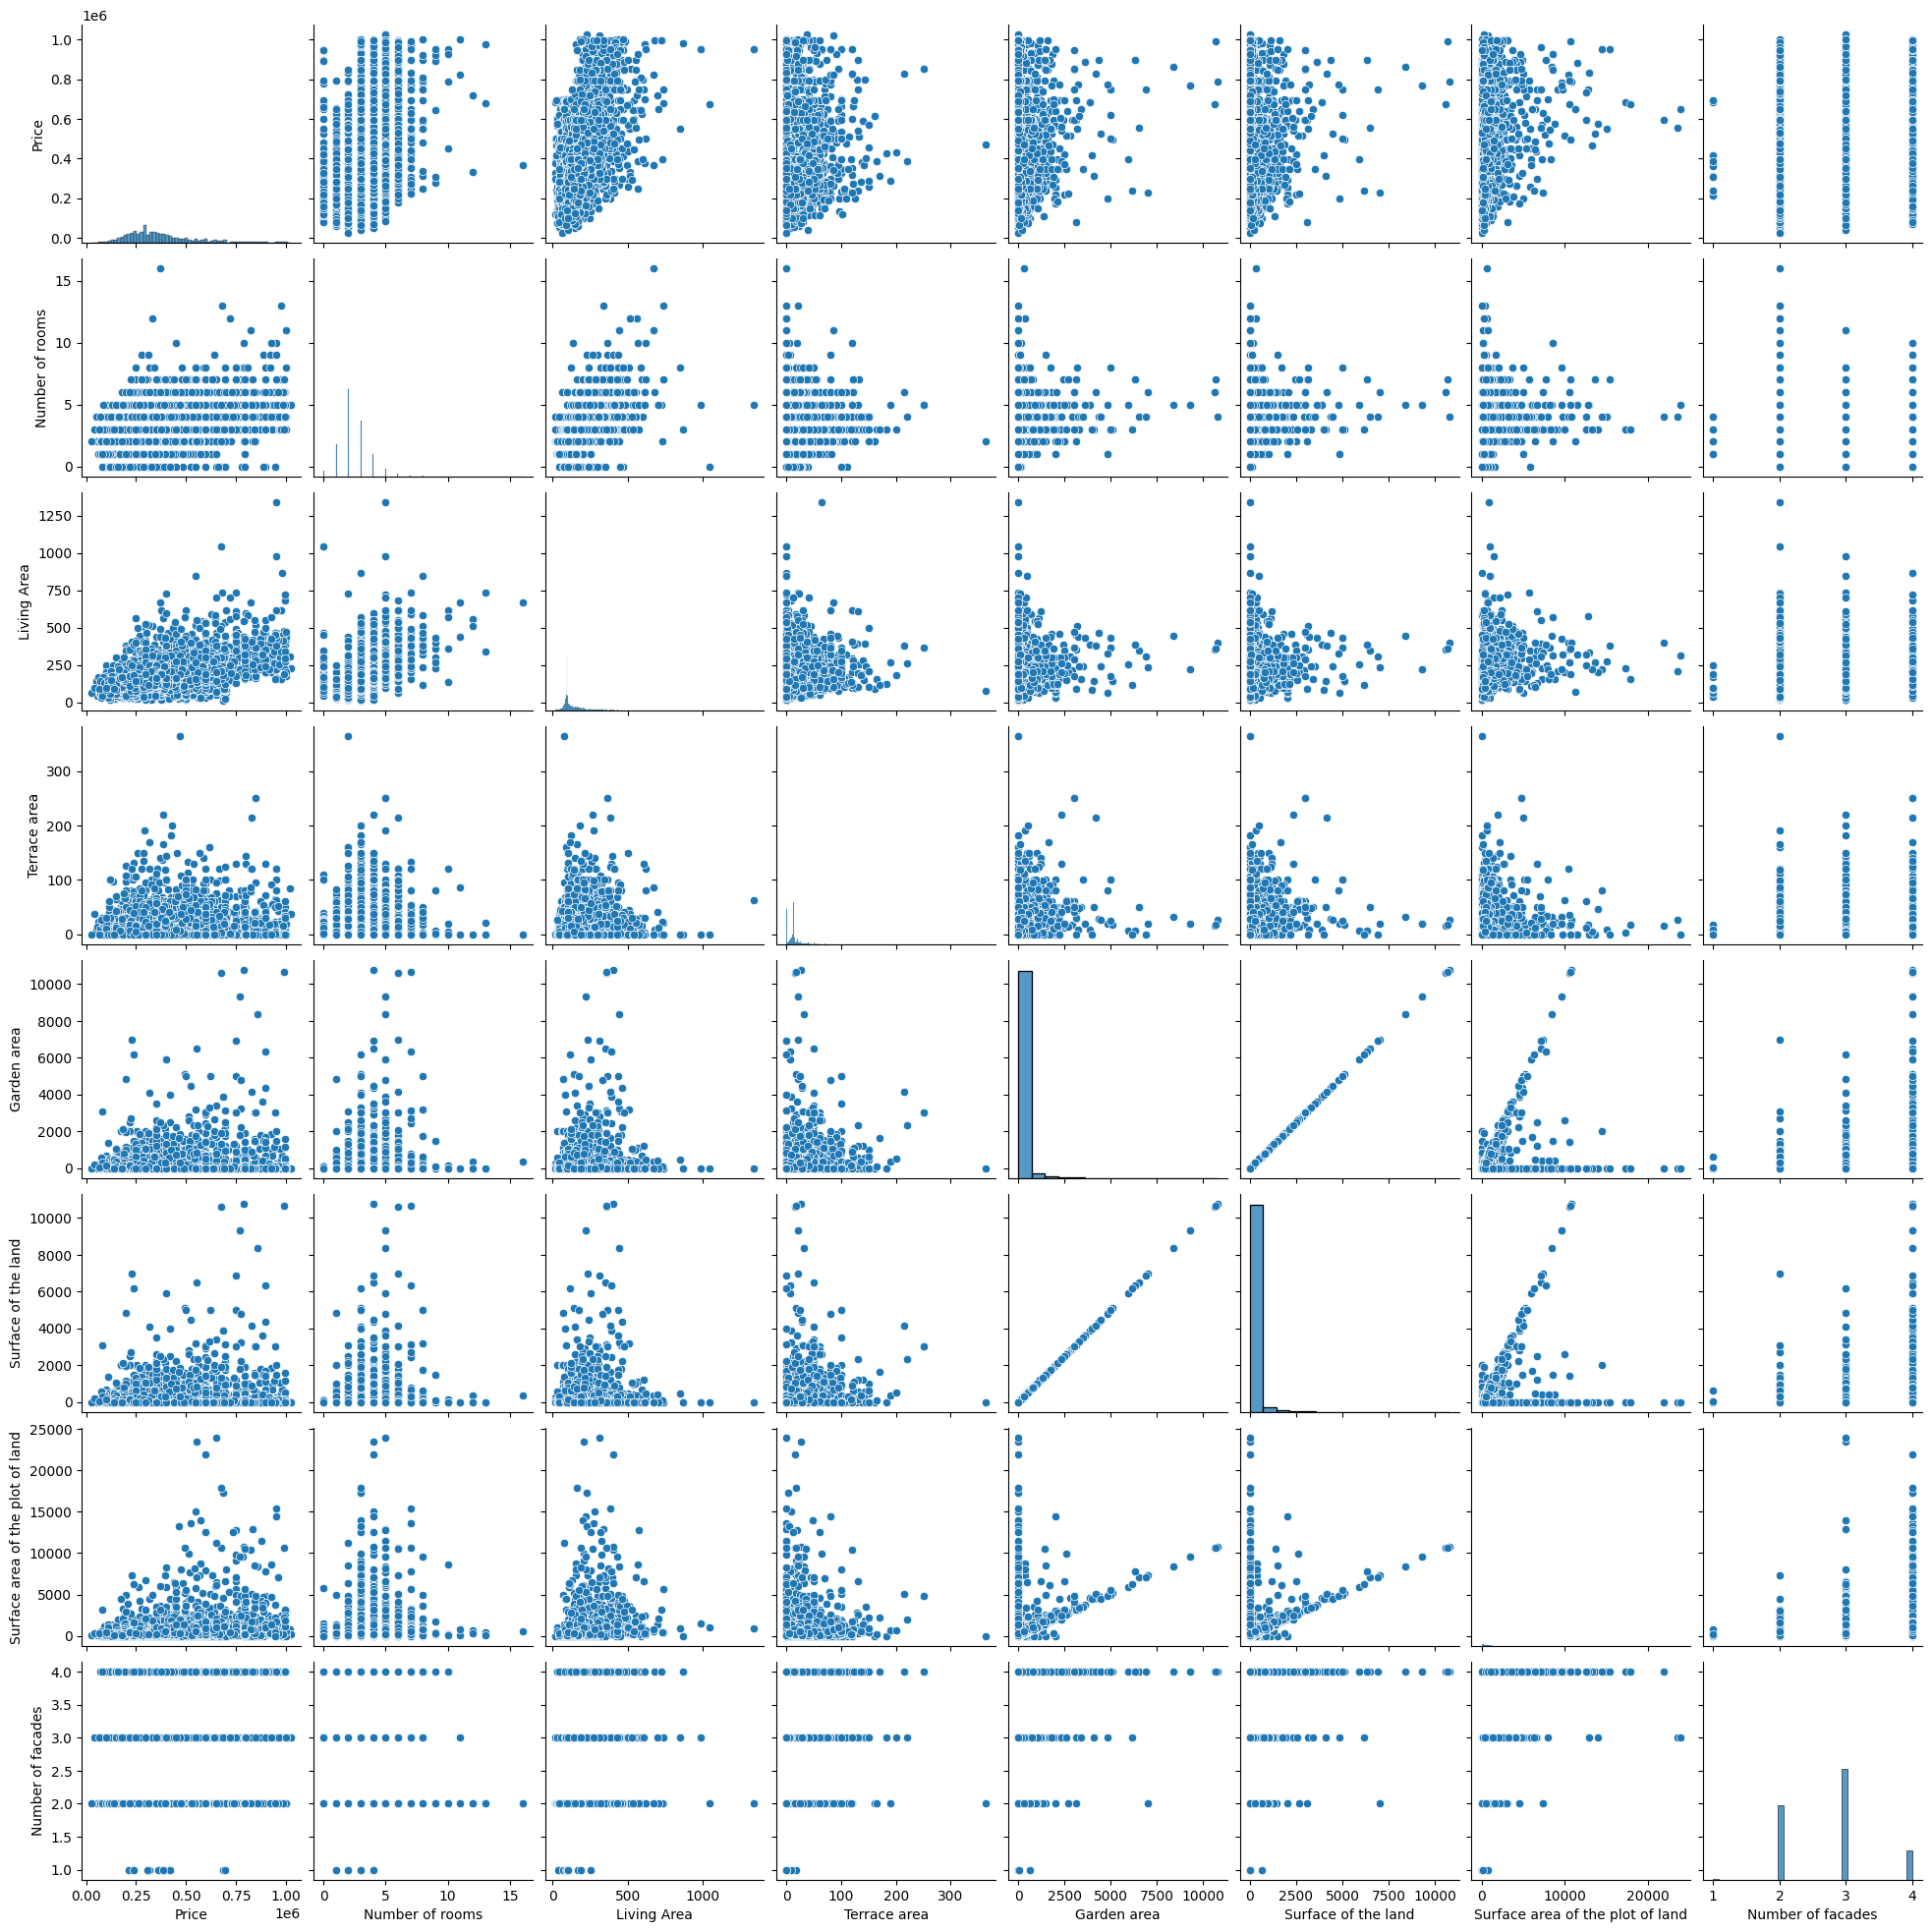

In [7]:
sns.pairplot(df, vars= continuous_columns )
plt.show()

In [13]:
corr_result = continuous_columns.corr(method='pearson')
corr_result

,Price,Number of rooms,Living Area,Terrace area,Garden area,Surface of the land,Surface area of the plot of land,Number of facades
Price,1.000000,0.464521,0.466505,0.149775,0.161547,0.161547,0.277513,0.160536
Number of rooms,0.464521,1.000000,0.649824,0.164663,0.231718,0.231718,0.316507,0.112713
Living Area,0.466505,0.649824,1.000000,0.206022,0.255553,0.255553,0.415030,0.197387
Terrace area,0.149775,0.164663,0.206022,1.000000,0.217426,0.217426,0.158016,0.141196
Garden area,0.161547,0.231718,0.255553,0.217426,1.000000,1.000000,0.448750,0.209114
Surface of the land,0.161547,0.231718,0.255553,0.217426,1.000000,1.000000,0.448750,0.209114
Surface area of the plot of land,0.277513,0.316507,0.415030,0.158016,0.448750,0.448750,1.000000,0.293004
Number of facades,0.160536,0.112713,0.197387,0.141196,0.209114,0.209114,0.293004,1.000000


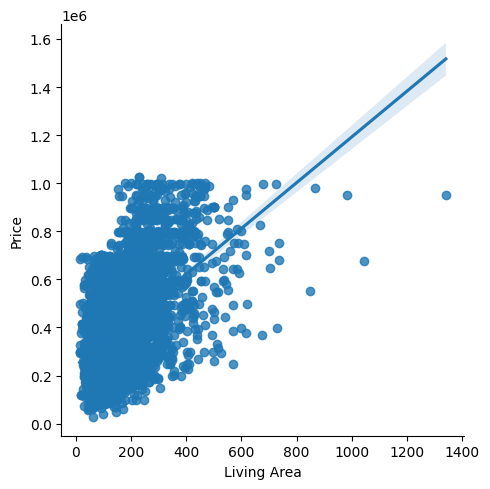

In [9]:
sns.lmplot(df, x = 'Living Area', y='Price')
plt.show()

<Axes: >

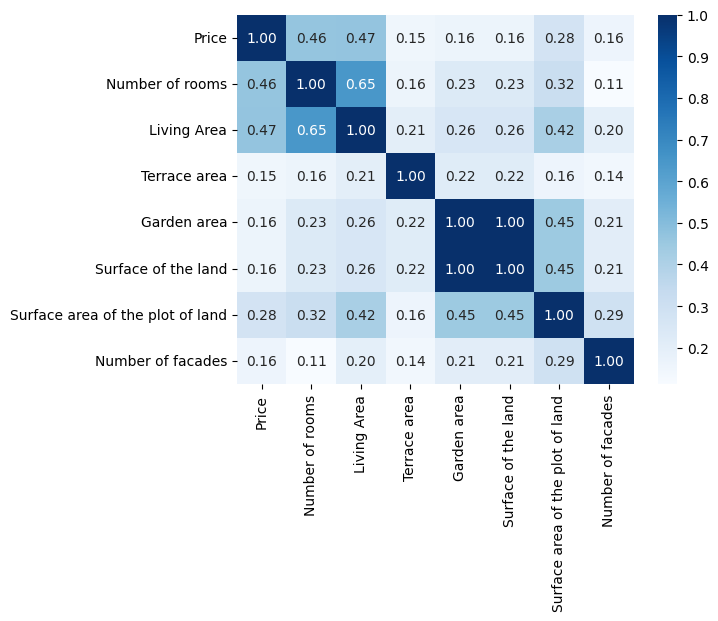

In [10]:
sns.heatmap(corr_result, annot=True, cmap='Blues', fmt='.2f')

In [18]:
import pandas as pd
from scipy.stats import spearmanr

continuous_columns= df[['Price', 'Number of rooms', 'Living Area', 'Terrace area', 'Garden area',
                      'Surface of the land','Surface area of the plot of land', 'Number of facades']]


corr, p_value = spearmanr(continuous_columns)

# Convert the correlation matrix to a DataFrame for better visualization
corr_df = pd.DataFrame(corr, columns=continuous_columns.columns, index=continuous_columns.columns)

# Display the correlation matrix
print(corr_df)


print("\nP-values of the correlation test:")
print(p_value)


                                     Price  Number of rooms  Living Area  \
Price                             1.000000         0.438632     0.268146   
Number of rooms                   0.438632         1.000000     0.590662   
Living Area                       0.268146         0.590662     1.000000   
Terrace area                      0.080446         0.063685     0.168517   
Garden area                       0.085137         0.338394     0.342399   
Surface of the land               0.085137         0.338394     0.342399   
Surface area of the plot of land  0.194478         0.647239     0.724848   
Number of facades                 0.121273         0.097360     0.182927   

                                  Terrace area  Garden area  \
Price                                 0.080446     0.085137   
Number of rooms                       0.063685     0.338394   
Living Area                           0.168517     0.342399   
Terrace area                          1.000000     0.164986   


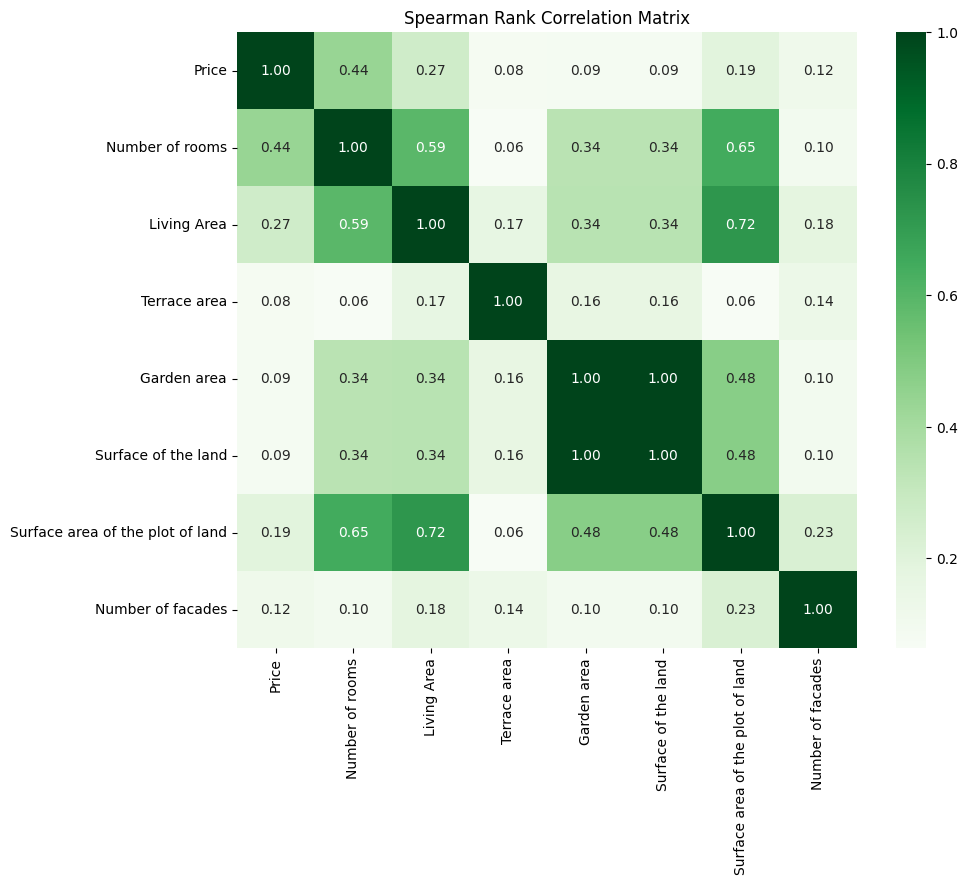

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the Spearman correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap="Greens", fmt=".2f", cbar=True)
plt.title("Spearman Rank Correlation Matrix")
plt.show()


In [140]:
for i in categorical_columns:
    print(f"df[{i}] = df[{i}].astype('category').cat.codes")

df[Type of property] = df[Type of property].astype('category').cat.codes
df[Subtype of property] = df[Subtype of property].astype('category').cat.codes
df[Type of sale] = df[Type of sale].astype('category').cat.codes
df[State of the building] = df[State of the building].astype('category').cat.codes
df[Compound Listing] = df[Compound Listing].astype('category').cat.codes
df[Fully equipped kitchen] = df[Fully equipped kitchen].astype('category').cat.codes
df[Furnished] = df[Furnished].astype('category').cat.codes
df[Fireplace] = df[Fireplace].astype('category').cat.codes
df[Terrace] = df[Terrace].astype('category').cat.codes
df[Garden] = df[Garden].astype('category').cat.codes
df[Swimming pool] = df[Swimming pool].astype('category').cat.codes


In [89]:
df['Type of property'] = df['Type of property'].astype('category').cat.codes
df['Subtype of property'] = df['Subtype of property'].astype('category').cat.codes
df['Type of sale'] = df['Type of sale'].astype('category').cat.codes
df['State of the building'] = df['State of the building'].astype('category').cat.codes
df['Compound Listing'] = df['Compound Listing'].astype('category').cat.codes
df['Fully equipped kitchen'] = df['Fully equipped kitchen'].astype('category').cat.codes
df['Furnished'] = df['Furnished'].astype('category').cat.codes
df['Fireplace'] = df['Fireplace'].astype('category').cat.codes
df['Terrace'] = df['Terrace'].astype('category').cat.codes
df['Garden'] = df['Garden'].astype('category').cat.codes
df['Swimming pool'] = df['Swimming pool'].astype('category').cat.codes

In [21]:
from pingouin import anova
import pandas as pd

categorical_columns = ['Type of property', 'Subtype of property', 'Type of sale', 
                       'State of the building', 'Compound Listing', 'Fully equipped kitchen',
                       'Furnished', 'Fireplace', 'Terrace', 'Garden', 'Swimming pool']

anova_results = []

# Perform ANOVA for each categorical variable
for col in categorical_columns:
    try:
        result = anova(dv='Price', between=col, data=df)
        anova_results.append({'Categorical Variable': col, 'p-value': result['p-unc'].iloc[0]})
    except Exception as e:
        anova_results.append({'Categorical Variable': col, 'p-value': None, 'Error': str(e)})


anova_df = pd.DataFrame(anova_results)
print(anova_df)


      Categorical Variable        p-value    Error
0         Type of property  3.648823e-106      NaN
1      Subtype of property   0.000000e+00      NaN
2             Type of sale            NaN  'p-unc'
3    State of the building   1.539459e-89      NaN
4         Compound Listing   3.236686e-05      NaN
5   Fully equipped kitchen   9.150074e-02      NaN
6                Furnished   1.022317e-01      NaN
7                Fireplace   4.829005e-39      NaN
8                  Terrace   1.677774e-30      NaN
9                   Garden   2.445520e-26      NaN
10           Swimming pool   5.636168e-57      NaN


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pingouin/parametric.py:1006: RuntimeWarning: invalid value encountered in scalar divide
  msbetween = ssbetween / ddof1


In [ ]:
#Beased on the result this test does not seem valid so I try another method

## Kruskal-Wallis test 
is a non-parametric test and an alternative to One-Way Anova. By non-parametric we mean, the data is not assumed to become from a particular distribution. The main objective of this test is used to determine whether there is a statistical difference between the medians of at least three independent groups. 
### Hypothesis:
The Kruskal-Wallis Test has the null and alternative hypotheses as discussed below:

The null hypothesis (H0): The median is the same for all the data groups.
The alternative hypothesis: (Ha): The median is not equal for all the data groups.

In [22]:
import pandas as pd
from scipy.stats import kruskal

results = []

categorical_data = df[['Type of property', 'Subtype of property', 
                       'State of the building', 'Compound Listing', 'Fully equipped kitchen',
                       'Furnished', 'Fireplace', 'Terrace', 'Garden', 'Swimming pool']] 

continuous_data = df[['Price']]

for cat_col in categorical_data.columns:
    # Get unique categories for this categorical variable
    categories = df[cat_col].unique()

    # Group the 'Price' data by the categorical variable
    groups = [df[df[cat_col] == category]['Price'] for category in categories]
    stat, p_value = kruskal(*groups)
    
    if p_value < 0.05:
        Difference = "Significant"
    else:
        Difference = "Not Significant"
    results.append({
        "Categorical Variable": cat_col,
        "H-statistic": stat,
        "P-value": p_value,
        "Difference": Difference
    })

results_df = pd.DataFrame(results)
print(results_df)


     Categorical Variable  H-statistic        P-value       Difference
0        Type of property   230.812016   3.965123e-52      Significant
1     Subtype of property  1275.100902  5.133558e-257      Significant
2   State of the building   572.627987  1.866815e-120      Significant
3        Compound Listing    13.673209   2.175359e-04      Significant
4  Fully equipped kitchen     0.284346   5.938670e-01  Not Significant
5               Furnished     0.179701   6.716305e-01  Not Significant
6               Fireplace   110.434644   7.869766e-26      Significant
7                 Terrace   219.310900   1.278483e-49      Significant
8                  Garden    57.369500   3.611648e-14      Significant
9           Swimming pool   134.061106   5.297954e-31      Significant


In [ ]:
# I had to remove 'Type of Sale' as it has only one category

### Box plot 
shows the data distribution of the continuous variable for each category. If the distribution for each of the categories is similar, which means the boxes are aligned, then, it indicates no correlation.

Similarly, if the data distribution is different for each category, which means the boxes are far from each other, then, it indicates that there is a correlation between the two variables.

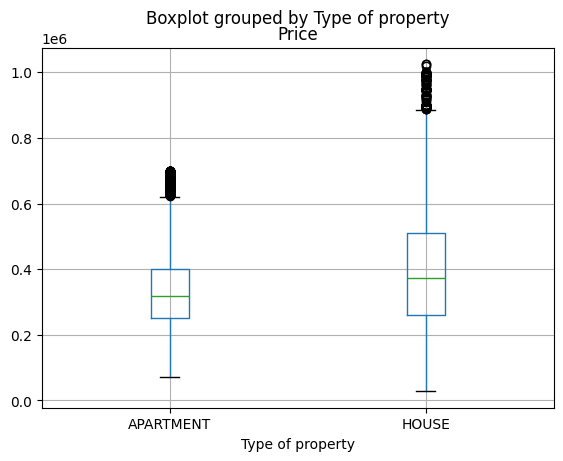

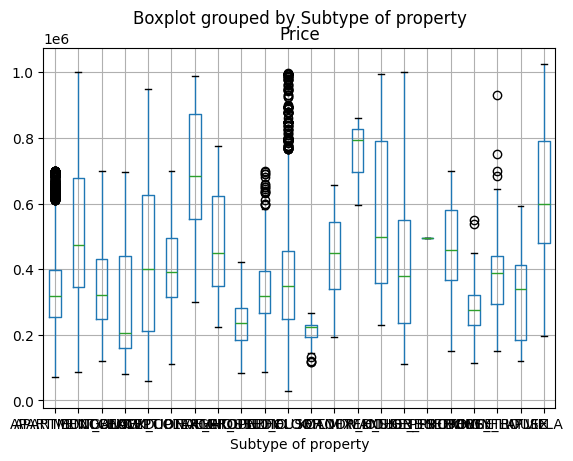

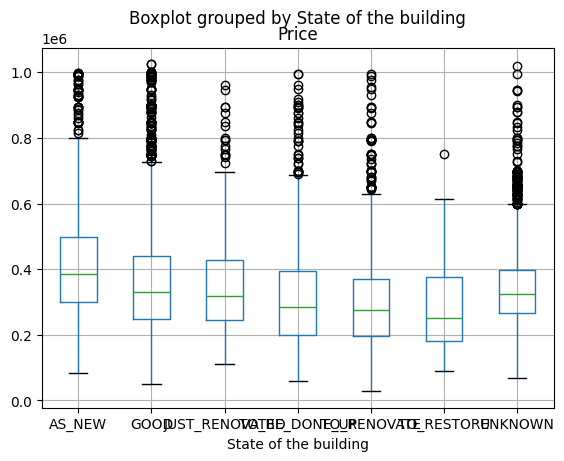

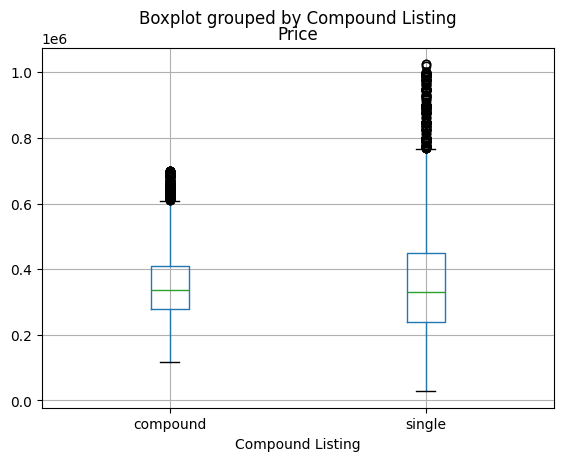

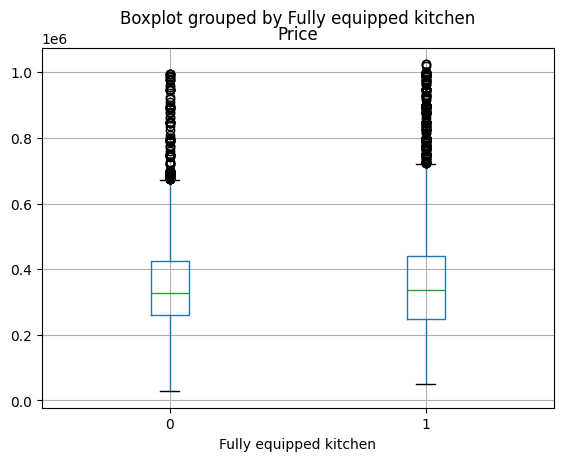

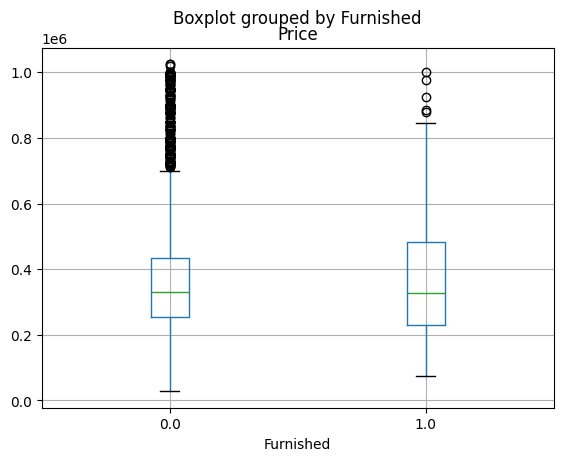

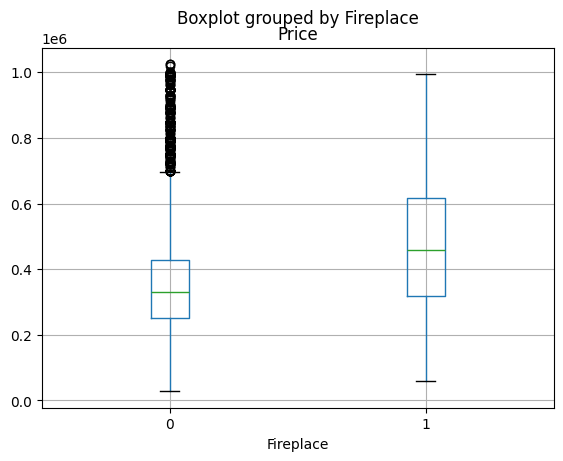

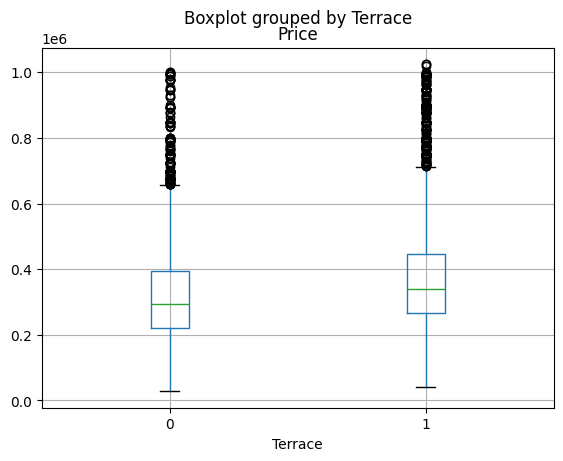

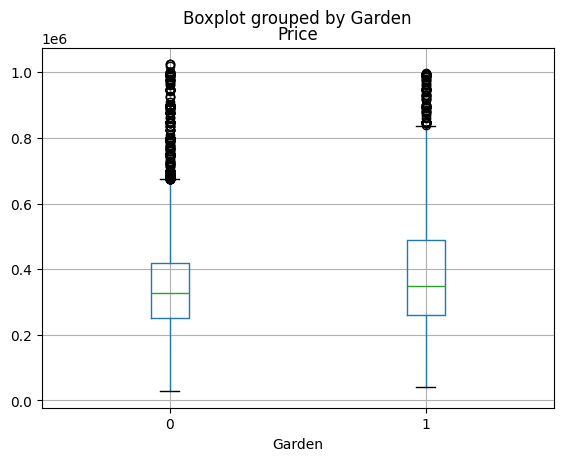

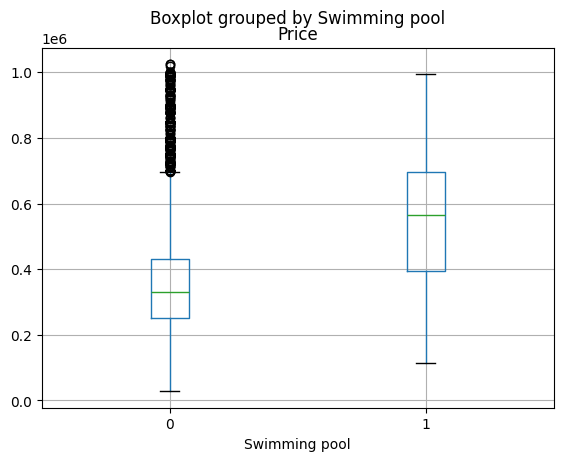

In [23]:
for col in categorical_data:
    df.boxplot(column="Price", by =col)
    plt.show()

In [ ]:
#how to show all results in one page like the matrix?

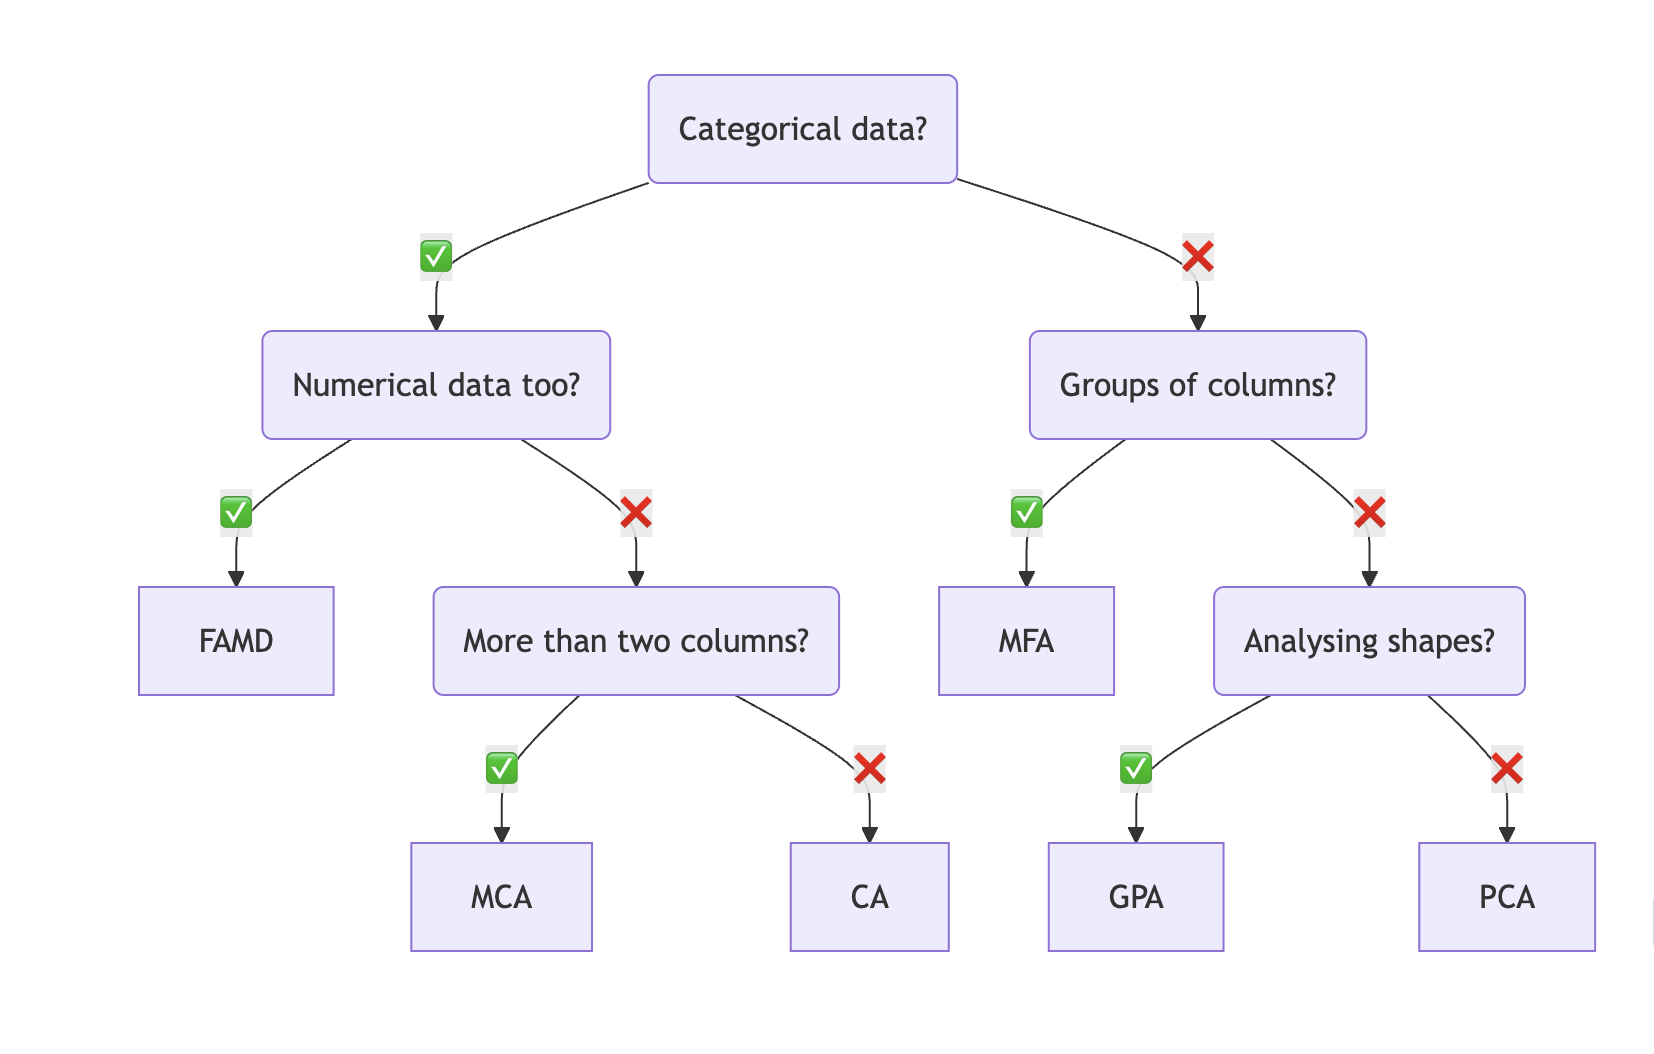

## Factorial Analysis of Mixed Data (FAMD) 
is a statistical method used to analyze datasets containing both categorical and numerical variables. It is particularly useful in exploratory data analysis for reducing dimensionality while preserving relationships in the data. In Python, you can use the prince library to perform FAMD.

In [ ]:
from light_famd import FAMD
required_data = df.iloc[:, 3:]
famd = FAMD(n_components=2)
famd.fit(required_data)



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/light_famd/mfa.py:91: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.00630212  0.00630212  0.00630212 ... -0.01442909 -0.01442909
 -0.01442909]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:, num] = (X.loc[:, num] - X.loc[:, num].mean()).apply(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/light_famd/mfa.py:91: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.00159695 -0.00159695 -0.00159695 ... -0.00159695 -0.00159695
 -0.00159695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:, num] = (X.loc[:, num] - X.loc[:, num].mean()).apply(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/light_famd/mfa.py:

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'